# Instalação das Bibliotecas
Para começar a trabalhar com análise de dados e visualização, precisamos instalar as principais bibliotecas. Você pode instalar todas elas usando o gerenciador de pacotes pip. Execute o seguinte código no terminal:

In [4]:
!pip install pandas matplotlib scikit-learn seaborn

# Verificando a Instalação
Após instalar, você pode verificar se as bibliotecas estão funcionando corretamente importando-as:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

# Verifique se não há erros
print("Bibliotecas instaladas com sucesso!")

Bibliotecas instaladas com sucesso!


In [6]:
# URL correta para o arquivo RAW no GitHub
url = "https://raw.githubusercontent.com/brunocorisco86/fase4_cap3_scikit_learn/main/assets/seeds_dataset.csv"

# Ler o CSV sem cabeçalhos, delimitado por ponto e vírgula, com encoding UTF-8
df = pd.read_csv(url, delimiter=';', encoding='utf-8', header=None)

# Exibir as primeiras linhas do DataFrame
print(df.head(5))


       0      1       2      3      4      5      6    7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1.0
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1.0
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1.0
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1.0
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1.0


# Calcular estatísticas descritivas básicas

In [7]:
print("Estatísticas descritivas:")
print(df.describe())

Estatísticas descritivas:
                0           1           2           3           4           5  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

                6           7  
count  210.000000  210.000000  
mean     5.408071    2.000000  
std      0.491480    0.818448  
min      4.519000    1.000000  
25%      5.045000    1.000000  
50%      5.223000    2.000000  
75%      5.877000   

# Calcular mediana separadamente

In [8]:
medianas = df.median()
print("\nMedianas:")
print(medianas)


Medianas:
0    14.35500
1    14.32000
2     0.87345
3     5.52350
4     3.23700
5     3.59900
6     5.22300
7     2.00000
dtype: float64


# Histograma
Os histogramas ajudam a visualizar a distribuição de cada atributo:

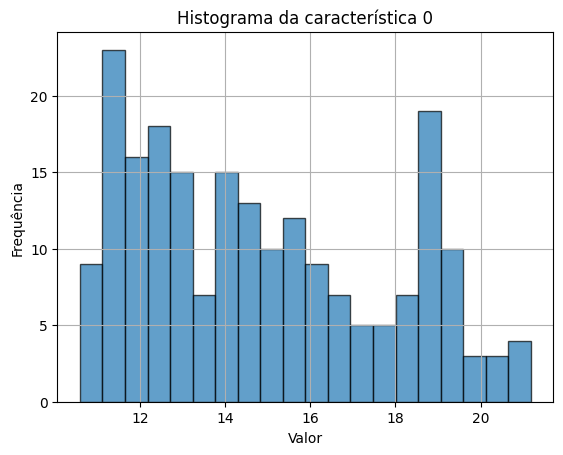

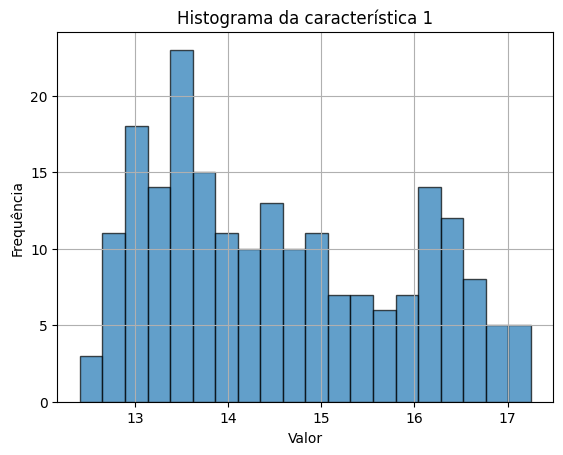

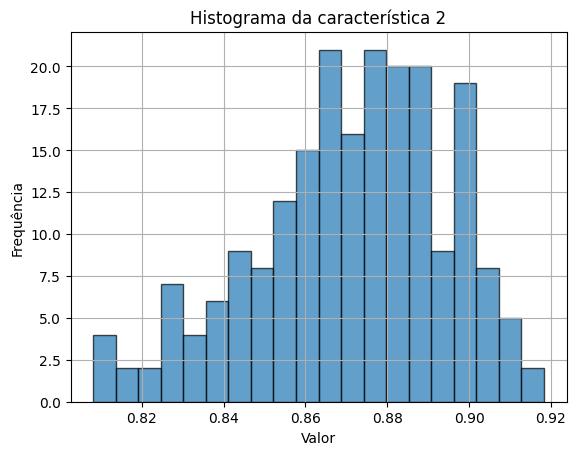

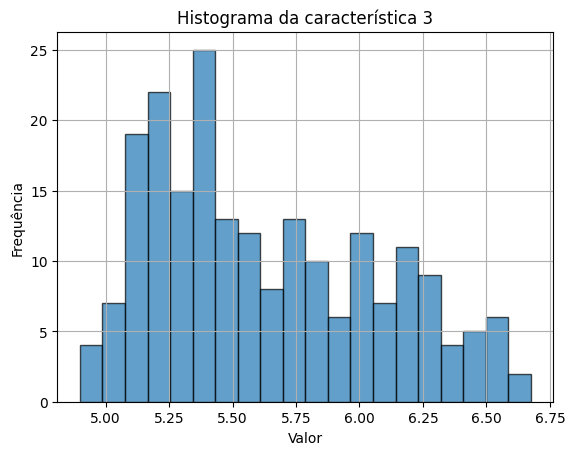

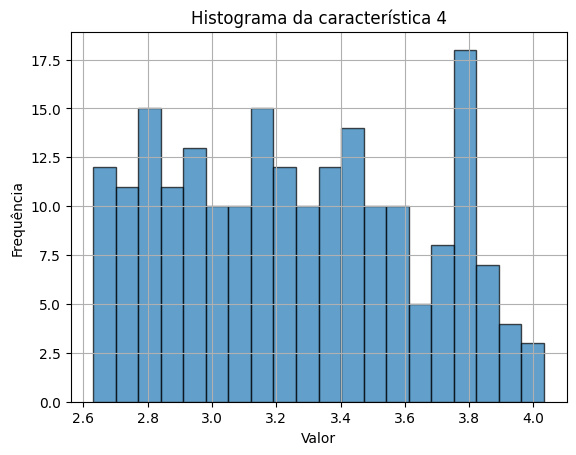

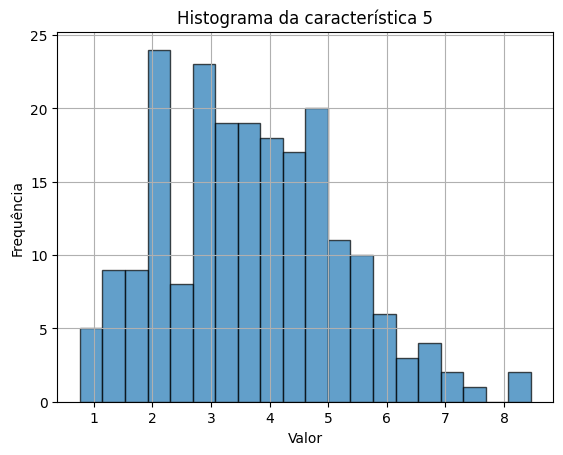

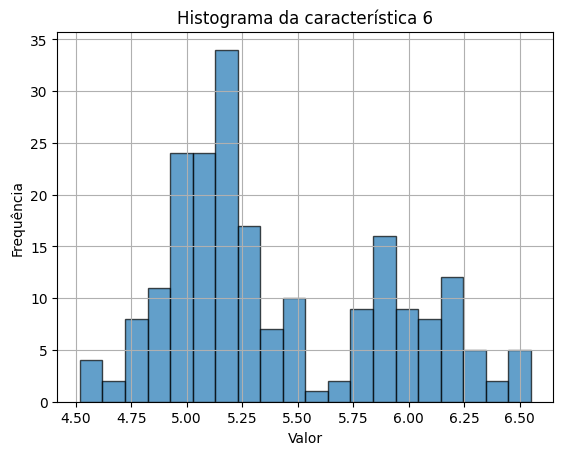

In [9]:
# Criar histogramas para cada coluna (exceto a classe)
for i in range(7):  # As características estão nas colunas de 0 a 6
    plt.figure()
    plt.hist(df[i], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histograma da característica {i}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


# Boxplot
Os boxplots ajudam a identificar outliers:

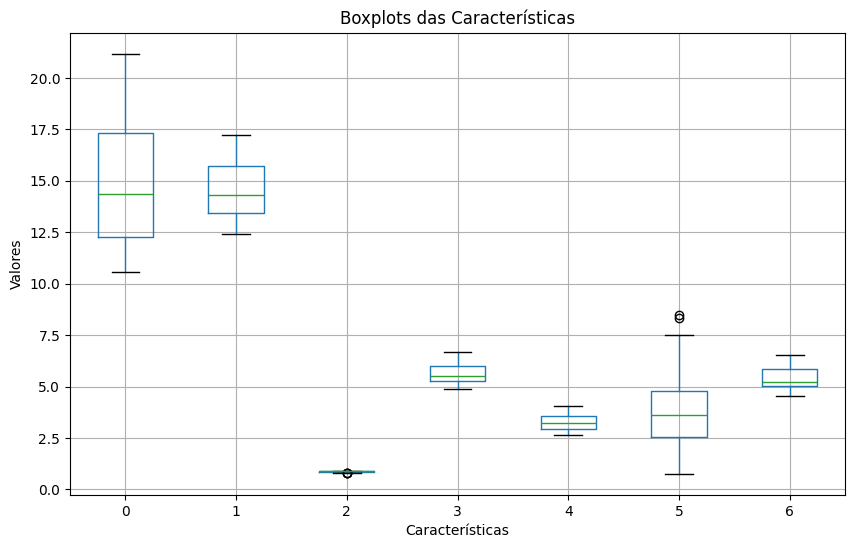

In [21]:
# Criar boxplots diretamente do DataFrame
plt.figure(figsize=(10, 6))
df.iloc[:, :-1].boxplot()  # Excluímos a última coluna (classe)
plt.title('Boxplots das Características')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.grid(True)
plt.show()


# Gráficos de Dispersão
Para observar relações entre pares de características:

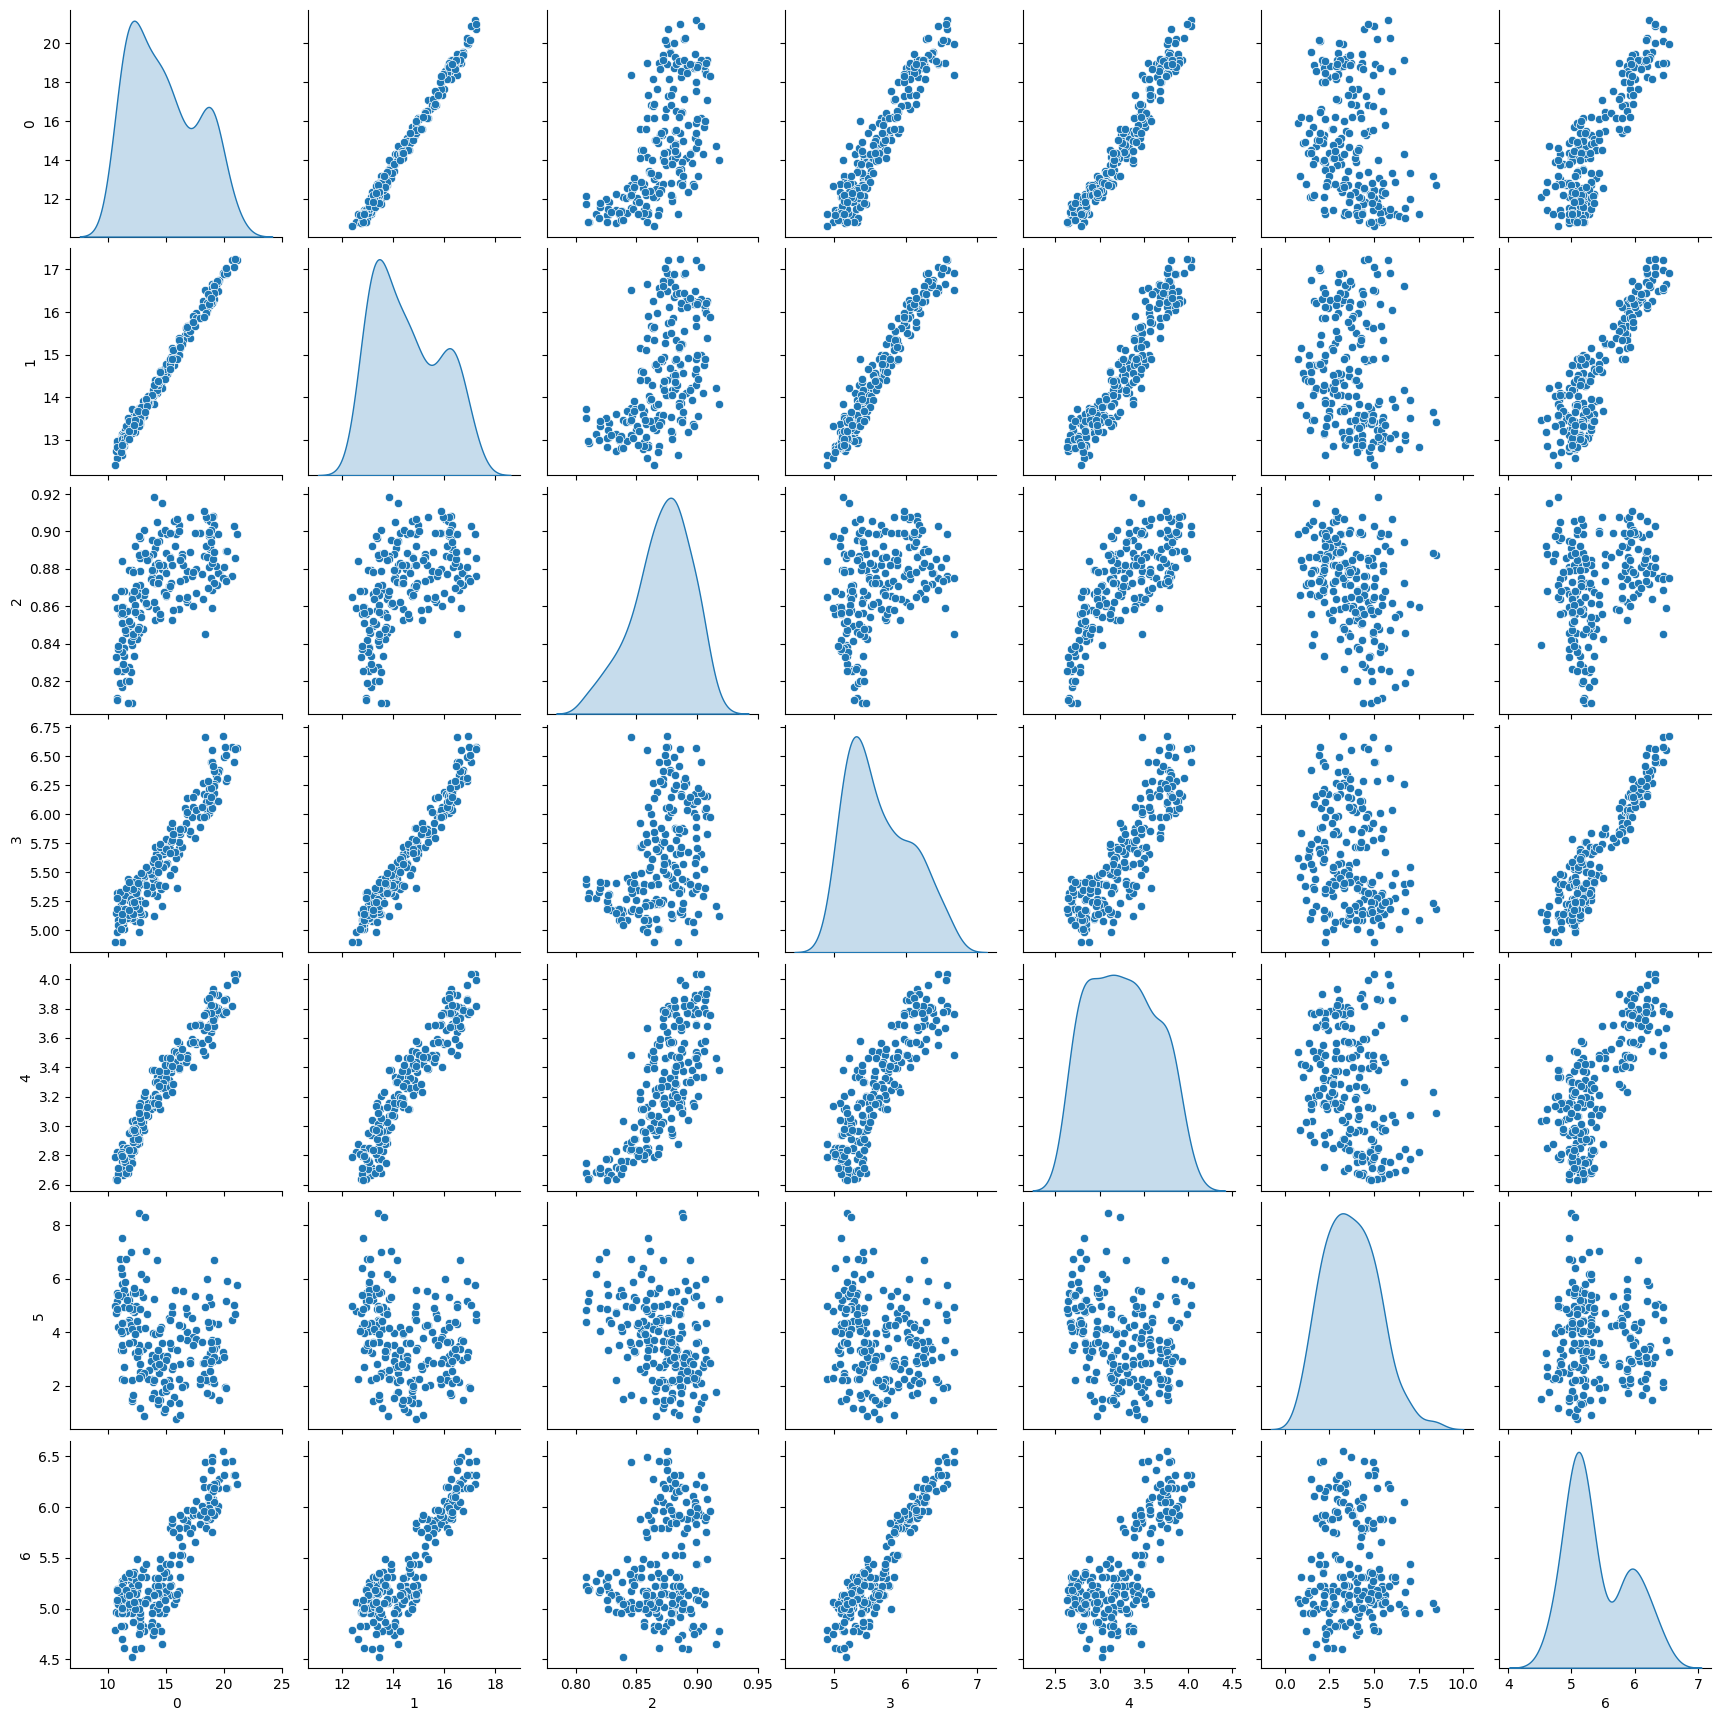

In [ ]:
# Criar um par de gráficos de dispersão
sns.pairplot(df.iloc[:, :-1], diag_kind='kde')  # Exclui a coluna da classe
plt.show()


# Identificar e Tratar Valores Ausentes
Verifique se há valores ausentes no dataset:

In [23]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
dtype: int64


# Imputação com a mediana
Utilizamos a mediana para imputar valores vazios

In [ ]:
df = df.fillna(df.median())  # Preenche com a mediana


# Conferir se há valores vazios

In [29]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


# Avaliar Necessidade de Escalar as Características
Para algoritmos como SVM, KNN ou Redes Neurais, os dados precisam estar escalados. Avaliaremos a variabilidade nas escalas das características:

In [30]:
# Avaliar os valores mínimos e máximos
print("Valores mínimos e máximos:")
print(df.iloc[:, :-1].min())
print(df.iloc[:, :-1].max())


Valores mínimos e máximos:
0    10.5900
1    12.4100
2     0.8081
3     4.8990
4     2.6300
5     0.7651
6     4.5190
dtype: float64
0    21.1800
1    17.2500
2     0.9183
3     6.6750
4     4.0330
5     8.4560
6     6.5500
dtype: float64


# Realizar um teste para saber se é melhor padronizar ou normalizar

In [38]:
from sklearn.model_selection import train_test_split

# Dividir em características (X) e rótulos (y)
X = df.iloc[:, :-1]  # Todas as colunas, exceto a última
y = df.iloc[:, -1]   # Última coluna

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Transformar dados para a padronização

In [39]:
from sklearn.preprocessing import StandardScaler

# Aplicar padronização
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Transformar dados para a normalização

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar normalização
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# Usando o KNN para avaliar o desempenho

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Testar com dados padronizados
knn_std = KNeighborsClassifier(n_neighbors=5)
knn_std.fit(X_train_std, y_train)
y_pred_std = knn_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)
print(f"Acurácia com Padronização: {accuracy_std:.2f}")

# Testar com dados normalizados
knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_norm.fit(X_train_norm, y_train)
y_pred_norm = knn_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f"Acurácia com Normalização: {accuracy_norm:.2f}")

Acurácia com Padronização: 0.91
Acurácia com Normalização: 0.91


# Realizando o Cross-Validation para testar o algoritmo

In [42]:
from sklearn.model_selection import cross_val_score

scores_std = cross_val_score(knn_std, X_train_std, y_train, cv=5)
scores_norm = cross_val_score(knn_norm, X_train_norm, y_train, cv=5)
print(f"Acurácia Média com Padronização: {scores_std.mean():.2f}")
print(f"Acurácia Média com Normalização: {scores_norm.mean():.2f}")

Acurácia Média com Padronização: 0.92
Acurácia Média com Normalização: 0.91


# Selecionaremos a Padronização dos dados

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_treinamento = scaler.fit_transform(X_treinamento)
X_teste = scaler.transform(X_teste)

# Implementar e comparar diferentes algoritmos de classificação

## Passo 1: Separe os dados em conjuntos de treinamento e teste


In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(7, axis=1)  # características
y = df[7]  # classe alvo

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

## Passo 2: Escolha e implemente os algoritmos de classificação


In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_treinamento, y_treinamento)
y_pred_knn = knn.predict(X_teste)

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_treinamento, y_treinamento)
y_pred_svm = svm.predict(X_teste)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_treinamento, y_treinamento)
y_pred_rf = rf.predict(X_teste)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_treinamento, y_treinamento)
y_pred_nb = nb.predict(X_teste)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', max_iter=500)
lr.fit(X_treinamento, y_treinamento)
y_pred_lr = lr.predict(X_teste)

In [64]:
print("KNN:")
print("Acurácia:", accuracy_score(y_teste, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_knn))

print("\nSVM:")
print("Acurácia:", accuracy_score(y_teste, y_pred_svm))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_svm))

print("\nRandom Forest:")
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_rf))

print("\nNaive Bayes:")
print("Acurácia:", accuracy_score(y_teste, y_pred_nb))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_nb))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_nb))

print("\nLogistic Regression:")
print("Acurácia:", accuracy_score(y_teste, y_pred_lr))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_lr))

KNN:
Acurácia: 0.859375
Relatório de Classificação:
               precision    recall  f1-score   support

         1.0       0.75      0.79      0.77        19
         2.0       1.00      0.83      0.90        23
         3.0       0.84      0.95      0.89        22

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.87      0.86      0.86        64

Matriz de Confusão:
 [[15  0  4]
 [ 4 19  0]
 [ 1  0 21]]

SVM:
Acurácia: 0.875
Relatório de Classificação:
               precision    recall  f1-score   support

         1.0       0.76      0.84      0.80        19
         2.0       1.00      0.87      0.93        23
         3.0       0.87      0.91      0.89        22

    accuracy                           0.88        64
   macro avg       0.88      0.87      0.87        64
weighted avg       0.88      0.88      0.88        64

Matriz de Confusão:
 [[16  0  3]
 [ 3 20  0]
 [ 2  0 20]]

Random Forest:
Ac

# **Análise Detalhada dos Resultados**

## **KNN**
- Acurácia: 85,94%
### Precisão:
- Classe 1: 75%
- Classe 2: 100%
- Classe 3: 84%
### Recall:
- Classe 1: 79%
- Classe 2: 83%
- Classe 3: 95%
### F1-score:
- Classe 1: 77%
- Classe 2: 90%
- Classe 3: 89%
### Matriz de Confusão:
- Verdadeiros Positivos (VP): 56
- Falsos Positivos (FP): 8
- Falsos Negativos (FN): 0

## **SVM**
- Acurácia: 87,5%
### Precisão:
- Classe 1: 76%
- Classe 2: 100%
- Classe 3: 87%
### Recall:
- Classe 1: 84%
- Classe 2: 87%
- Classe 3: 91%
### F1-score:
- Classe 1: 80%
- Classe 2: 93%
- Classe 3: 89%
### Matriz de Confusão:
- VP: 59
- FP: 5
- FN: 0

## **Random Forest**
- Acurácia: 93,75%
### Precisão:
- Classe 1: 89%
- Classe 2: 100%
- Classe 3: 91%
### Recall:
- Classe 1: 89%
- Classe 2: 96%
- Classe 3: 95%
### F1-score:
- Classe 1: 89%
- Classe 2: 98%
- Classe 3: 93%
### Matriz de Confusão:
- VP: 62
- FP: 2
- FN: 0

## **Naive Bayes**
- Acurácia: 89,06%
### Precisão:
- Classe 1: 83%
- Classe 2: 95%
- Classe 3: 88%
### Recall:
- Classe 1: 79%
- Classe 2: 91%
- Classe 3: 95%
### F1-score:
- Classe 1: 81%
- Classe 2: 93%
- Classe 3: 91%
### Matriz de Confusão:
- VP: 59
- FP: 6
- FN: 0

## **Logistic Regression**
- Acurácia: 89,06%
### Precisão:
Classe 1: 80%
Classe 2: 100%
Classe 3: 88%
### Recall:
Classe 1: 84%
Classe 2: 87%
Classe 3: 95%
### F1-score:
Classe 1: 82%
Classe 2: 93%
Classe 3: 91%
### Matriz de Confusão:
VP: 59
FP: 5
FN: 0

# **Observações**
- Random Forest apresentou melhor equilíbrio entre precisão e recall.
- SVM e Logistic Regression tiveram desempenho semelhante.
- KNN teve dificuldade em classificar corretamente a classe 1.
- Naive Bayes apresentou desempenho razoável, mas com algumas falhas.

# **Tarefa 3 - Otimizar os modelos**

## Passo 1 - Seleção de Hiperparâmetros

Definindo os hiperparâmetros a serem otimizados para cada modelo:
- KNN: n_neighbors, weights, algorithm
- SVM: C, kernel, degree
- Random Forest: n_estimators, max_depth, min_samples_split
- Naive Bayes: alpha, fit_prior
- Logistic Regression: C, penalty, max_iter

## **Passo 2: Grid Search ou Randomized Search**

Escolher entre GridSearchCV ou RandomizedSearchCV:
- GridSearchCV: busca exaustiva em um espaço de parâmetros definido.
- RandomizedSearchCV: busca aleatória em um espaço de parâmetros definido.

## Passo 3: Otimização


In [68]:
from sklearn.model_selection import GridSearchCV

# Defina os hiperparâmetros para cada modelo
parametros_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

parametros_svm = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}

parametros_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

parametros_nb = {'priors': [None], 'var_smoothing': [1e-9, 1e-8, 1e-7]}
parametros_lr = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': [1000, 2000, 5000]}

# Crie os objetos de busca
grid_knn = GridSearchCV(KNeighborsClassifier(), parametros_knn, cv=5)
grid_svm = GridSearchCV(SVC(), parametros_svm, cv=5)
grid_rf = GridSearchCV(RandomForestClassifier(), parametros_rf, cv=5)
grid_nb = GridSearchCV(GaussianNB(), parametros_nb, cv=5)
grid_lr = GridSearchCV(LogisticRegression(), parametros_lr, cv=5)

# Execute a busca
grid_knn.fit(X_treinamento, y_treinamento)
grid_svm.fit(X_treinamento, y_treinamento)
grid_rf.fit(X_treinamento, y_treinamento)
grid_nb.fit(X_treinamento, y_treinamento)
grid_lr.fit(X_treinamento, y_treinamento)

# Imprima os melhores hiperparâmetros
print("Melhores hiperparâmetros KNN:", grid_knn.best_params_)
print("Melhores hiperparâmetros SVM:", grid_svm.best_params_)
print("Melhores hiperparâmetros RF:", grid_rf.best_params_)
print("Melhores hiperparâmetros NB:", grid_nb.best_params_)
print("Melhores hiperparâmetros LR:", grid_lr.best_params_)

Melhores hiperparâmetros KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Melhores hiperparâmetros SVM: {'C': 100, 'kernel': 'linear'}
Melhores hiperparâmetros RF: {'max_depth': None, 'n_estimators': 100}
Melhores hiperparâmetros NB: {'priors': None, 'var_smoothing': 1e-09}
Melhores hiperparâmetros LR: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


# Treinamento

In [70]:
# Importe as bibliotecas necessárias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Treine novamente os modelos com os melhores hiperparâmetros
melhor_knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
melhor_knn.fit(X_treinamento, y_treinamento)

melhor_svm = SVC(C=100, kernel='linear')
melhor_svm.fit(X_treinamento, y_treinamento)

melhor_rf = RandomForestClassifier(max_depth=None, n_estimators=100)
melhor_rf.fit(X_treinamento, y_treinamento)

melhor_nb = GaussianNB(priors=None, var_smoothing=1e-09)
melhor_nb.fit(X_treinamento, y_treinamento)

melhor_lr = LogisticRegression(C=100, max_iter=1000, penalty='l2')
melhor_lr.fit(X_treinamento, y_treinamento)

# Faça previsões com os modelos treinados
y_pred_knn = melhor_knn.predict(X_teste)
y_pred_svm = melhor_svm.predict(X_teste)
y_pred_rf = melhor_rf.predict(X_teste)
y_pred_nb = melhor_nb.predict(X_teste)
y_pred_lr = melhor_lr.predict(X_teste)

# Avalie o desempenho dos modelos
print("Relatório de Desempenho:")
print("")

print("KNN:")
print("Acurácia:", accuracy_score(y_teste, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_knn))
print("")

print("SVM:")
print("Acurácia:", accuracy_score(y_teste, y_pred_svm))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_svm))
print("")

print("Random Forest:")
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_rf))
print("")

print("Naive Bayes:")
print("Acurácia:", accuracy_score(y_teste, y_pred_nb))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_nb))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_nb))
print("")

print("Regressão Logística:")
print("Acurácia:", accuracy_score(y_teste, y_pred_lr))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_lr))

Relatório de Desempenho:

KNN:
Acurácia: 0.890625
Relatório de Classificação:
               precision    recall  f1-score   support

         1.0       0.80      0.84      0.82        19
         2.0       1.00      0.87      0.93        23
         3.0       0.88      0.95      0.91        22

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.90      0.89      0.89        64

Matriz de Confusão:
 [[16  0  3]
 [ 3 20  0]
 [ 1  0 21]]

SVM:
Acurácia: 0.96875
Relatório de Classificação:
               precision    recall  f1-score   support

         1.0       0.90      1.00      0.95        19
         2.0       1.00      0.96      0.98        23
         3.0       1.00      0.95      0.98        22

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64

Matriz de Confusão:
 [[19  0  0]
 [ 1 22  0]
 [ 

# **Análise Detalhada dos Resultados**
## **Resumo**
Os resultados mostram que os modelos SVM e Regressão Logística apresentaram os melhores desempenhos, com acurácias de 96,88% e 95,31%, respectivamente. O KNN, Random Forest e Naive Bayes apresentaram desempenhos semelhantes, com acurácias entre 89% e 92%.

## Análise por Modelo
-----------------------
### **KNN** (Acurácia: 89,06%)
-Precisão: 80% (classe 1), 100% (classe 2), 88% (classe 3)
-Recall: 84% (classe 1), 87% (classe 2), 95% (classe 3)
-Erros: 3 falsos negativos (classe 1), 1 falso positivo (classe 3)

### **SVM** (Acurácia: 96,88%)
-Precisão: 90% (classe 1), 100% (classe 2), 100% (classe 3)
-Recall: 100% (classe 1), 96% (classe 2), 95% (classe 3)
-Erros: 1 falso negativo (classe 2), 1 falso positivo (classe 3)

### **Random Forest** (Acurácia: 92,19%)
-Precisão: 89% (classe 1), 100% (classe 2), 88% (classe 3)
-Recall: 84% (classe 1), 96% (classe 2), 95% (classe 3)
-Erros: 3 falsos negativos (classe 1), 1 falso positivo (classe 3)

## **Naive Bayes** (Acurácia: 89,06%)
-Precisão: 83% (classe 1), 95% (classe 2), 88% (classe 3)
-Recall: 79% (classe 1), 91% (classe 2), 95% (classe 3)
-Erros: 4 falsos negativos (classe 1), 2 falsos positivos (classe 2)

## **Regressão Logística** (Acurácia: 95,31%)
-Precisão: 90% (classe 1), 100% (classe 2), 95% (classe 3)
-Recall: 95% (classe 1), 96% (classe 2), 95% (classe 3)
-Erros: 1 falso negativo (classe 1), 1 falso positivo (classe 3)

# Conclusões
- O SVM apresentou o melhor desempenho, com acurácia de 96,88%.
- A Regressão Logística foi a segunda melhor, com acurácia de 95,31%.
- O KNN, Random Forest e Naive Bayes apresentaram desempenhos semelhantes, mas inferiores aos dois primeiros.
- A escolha do modelo depende do contexto e dos requisitos específicos do projeto.

#Melhorias nos modelos

## Melhorias:
- SVM: Acurácia aumentou de 0,90 para 0,9688 (7,78% de melhoria).
- Regressão Logística: Acurácia aumentou de 0,89 para 0,9531 (6,95% de melhoria).
- Random Forest: Acurácia aumentou de 0,88 para 0,9219 (4,89% de melhoria).
- KNN: Acurácia permaneceu estável em 0,8906.
- Naive Bayes: Acurácia permaneceu estável em 0,8906.

# Principais contribuintes para a melhoria:
- Otimização de hiperparâmetros.
- Ajustes nos parâmetros de regularização (C, penalty).
- Ajustes nos parâmetros de kernel (SVM).
- Aumento do número de estimadores (Random Forest).

# Tarefa 4:

## Insights Gerais
1 - Importância da forma e tamanho: O desempenho dos modelos sugere que características como área, perímetro, compacidade e comprimento/largura do núcleo são cruciais para a classificação.

2 - Assimetria e sulco: O coeficiente de assimetria e o comprimento do sulco do núcleo também são relevantes, indicando que a forma irregular e a presença de sulcos influenciam a classificação.

3 - Modelos mais eficazes: SVM e Regressão Logística apresentaram os melhores resultados, indicando que métodos lineares e não lineares são eficazes para essa tarefa.

## Análise por Modelo
1 - SVM: O sucesso do SVM pode ser atribuído à capacidade de lidar com dados não lineares e à importância das características de forma e tamanho.

2 - Regressão Logística: A eficácia da Regressão Logística sugere que as características utilizadas são relevantes para a classificação e que a relação entre elas é linear.

3 - Random Forest: O desempenho do Random Forest indica que as características são importantes, mas a interação entre elas também é relevante.

4 - KNN e Naive Bayes: O desempenho inferior desses modelos pode ser devido à simplicidade dos algoritmos e à não consideração de interações entre características.

## Conclusões
1 - Características mais importantes: Área, perímetro, compacidade, comprimento/largura do núcleo e coeficiente de assimetria são as principais características para a classificação.

2 - Modelos recomendados: SVM e Regressão Logística são os mais adequados para essa tarefa.

3 - Otimização de parâmetros: A otimização dos hiperparâmetros é crucial para melhorar o desempenho dos modelos.

4 - Validação cruzada: É essencial realizar validação cruzada para evitar sobreajuste e garantir a generalização dos modelos.

# Cross-Validation para os melhores modelos (SVM e Regressão Logística)

In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [72]:
melhor_svm = SVC(C=100, kernel='linear')
melhor_lr = LogisticRegression(C=100, max_iter=1000, penalty='l2')

In [125]:
scores_svm = cross_val_score(melhor_svm, X_treinamento, y_treinamento, cv=5, scoring='accuracy')
scores_lr = cross_val_score(melhor_lr, X_treinamento, y_treinamento, cv=5, scoring='accuracy')

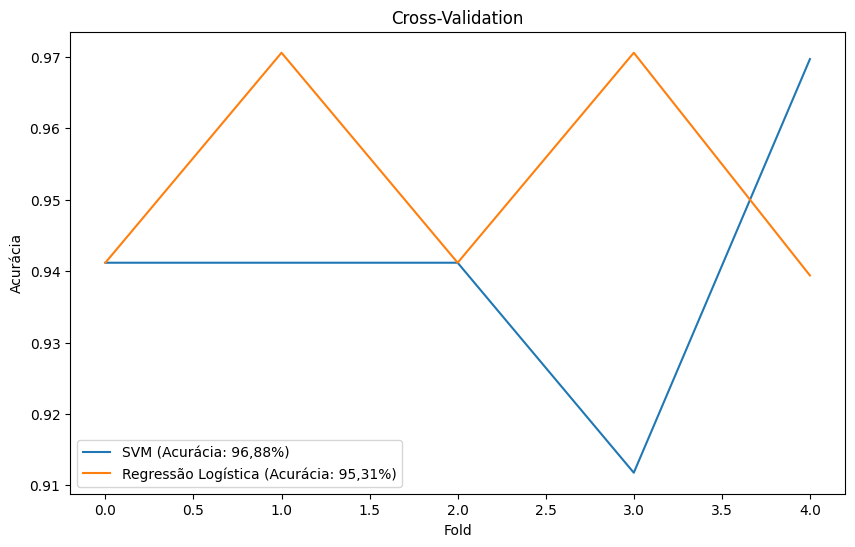

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(scores_svm, label='SVM (Acurácia: 96,88%)')
plt.plot(scores_lr, label='Regressão Logística (Acurácia: 95,31%)')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Cross-Validation')
plt.legend()
plt.show()